# Tarea: Tweeter Sentiment Analysis (Fecha de Entrega antes de la siguiente clase)

1. Preprocesar cada uno de los tweets usando las técnicas que vimos en la clase (8 puntos).
2. Visualizar una nube de palabras para los tweets marcados como positivos y como negativos. (2 puntos)
3. Usando la columna label, crear un modelo clasificador de tweets. Probar con BOW, TFIDF y Word2Vec. Mostrar los resultados de accuracy para cada modelo (5 puntos)
4. Seleccionar aleatoriamente 100 tweets. Luego crear una función para que recorra cada uno de los 100 tweets y clasfique como Positivo o Negativo usando el API de ChatGPT. Comparar este resultado con los resultados usando los modelos de la parte 3. ¿A cuál más se parecen los resultados? Comentar. (5 puntos)

In [2]:
import pandas as pd

In [28]:
tweets_df = pd.read_csv('https://raw.githubusercontent.com/CristhianCastro25/Programacion_Analisis_Exploratorio/main/twitter.csv')

In [4]:
tweets_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [5]:
tweets_df['label'].value_counts()

,count
label,
0,29720
1,2242


In [6]:
tweets_df[tweets_df['label']==1]['tweet'].iloc[10]

'@user why not @user mocked obama for being black.  @user @user @user @user #brexit'

In [7]:
tweets_df[tweets_df['label']==0]['tweet'].iloc[1]

"@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked"

In [8]:
texto = tweets_df[tweets_df['label']==1]['tweet'].iloc[300]
texto

"@user .@user gives white nationalist  troll a platform to spread his hate.  won't be reading/buying any of their booâ\x80¦"

In [9]:
texto = tweets_df[tweets_df['label']==1]['tweet'].iloc[550]
texto

'aptly named... we have whitesboro in ny with its ndn killing town seal, and whiteland with its mascot '

<h5>Eliminamos palabras con caracteres raros y nos quedamos con palabras que usen letras</h5>

In [31]:
import pandas as pd
import re


def get_unique_words(df):

    unique_words = set()
    for tweet in df['tweet']:
        # Tokenize and clean words
        words = re.findall(r'\b[a-zA-ZñÑáéíóúÁÉÍÓÚüÜ]{3,}\b', tweet.lower())
        for word in words:
            unique_words.add(word)
    return list(unique_words)

unique_words_list = get_unique_words(tweets_df)
print(f"Cantidad de palabras únicas: {len(unique_words_list)}")
unique_words_list.sort()
print(unique_words_list)

Cantidad de palabras únicas: 35509
['aaa', 'aaaaa', 'aaaaaand', 'aaaaah', 'aaaaand', 'aaahh', 'aaahhhh', 'aaahhhhh', 'aaand', 'aaawwwww', 'aaberg', 'aadityaji', 'aah', 'aakhri', 'aal', 'aaliyah', 'aamaadmipay', 'aameer', 'aamirkhan', 'aande', 'aap', 'aapi', 'aaptards', 'aarakshan', 'aarhus', 'aaron', 'aaronorentas', 'aaronrhodes', 'aarya', 'aaryn', 'aascf', 'aayat', 'aba', 'abandoned', 'abandons', 'abantu', 'abasel', 'abba', 'abbey', 'abbibuckets', 'abbie', 'abbotabad', 'abbott', 'abbu', 'abby', 'abbyybelle', 'abc', 'abcdiscovers', 'abd', 'abdominal', 'abducted', 'abe', 'abeed', 'abella', 'abenomics', 'aberdeen', 'aberrant', 'aberystwyth', 'abetting', 'abg', 'abhi', 'abhishek', 'abi', 'abiding', 'abilities', 'ability', 'abitur', 'abject', 'abk', 'able', 'ableg', 'ableism', 'ablonde', 'abndp', 'aboed', 'aboion', 'abomination', 'about', 'aboutlastnight', 'aboutmynextmove', 'abouttime', 'above', 'abpoli', 'abraham', 'abrahamhicks', 'abrandnewday', 'abrazo', 'abricotines', 'abroad', 'abs',

<h4>1.Preprocesar cada uno de los tweets usando las técnicas que vimos en la clase (8 puntos).</h4>

## Stemming

In [32]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import pandas as pd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [34]:
# Aplicar stemming a cada palabra en la lista
porter = nltk.PorterStemmer()
stemmed_words = [porter.stem(word) for word in unique_words_list]

# Imprimir los resultados
for original, stemmed in zip(unique_words_list, stemmed_words):
    print(f"{original} -> {stemmed}")

Se han truncado las últimas 5000 líneas del flujo de salida.
syrian -> syrian
syrianrefugees -> syrianrefuge
sysadmin -> sysadmin
system -> system
systematically -> systemat
systemd -> systemd
systemic -> system
systemicracism -> systemicrac
systems -> system
sztuka -> sztuka
szymanowski -> szymanowski
szymanski -> szymanski
taare -> taar
tab -> tab
tabarez -> tabarez
tabby -> tabbi
tabique -> tabiqu
table -> tabl
tablecloth -> tablecloth
tabledancing -> tabledanc
tables -> tabl
tablet -> tablet
tabletop -> tabletop
tack -> tack
tackle -> tackl
tackled -> tackl
tackling -> tackl
tacky -> tacki
tacloban -> tacloban
taco -> taco
tacobell -> tacobel
tacos -> taco
tacosforlunch -> tacosforlunch
tacotuesday -> tacotuesday
tact -> tact
tactics -> tactic
tadelakt -> tadelakt
tae -> tae
taeil -> taeil
taeiriya -> taeiriya
taeyang -> taeyang
taeyeon -> taeyeon
taffy -> taffi
tafree -> tafre
tag -> tag
tagafriend -> tagafriend
tagforlikes -> tagforlik
tagg -> tagg
tagging -> tag
tags -> tag
tags

## Lemmatization

In [39]:
lemmatizer = nltk.WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [40]:
lemmatized_words = [lemmatizer.lemmatize(word) for word in unique_words_list]

print("\nResultados de Lemmatization:")
for original, lemmatized in zip(unique_words_list, lemmatized_words):
    print(f"{original} -> {lemmatized}")

Se han truncado las últimas 5000 líneas del flujo de salida.
syrian -> syrian
syrianrefugees -> syrianrefugees
sysadmin -> sysadmin
system -> system
systematically -> systematically
systemd -> systemd
systemic -> systemic
systemicracism -> systemicracism
systems -> system
sztuka -> sztuka
szymanowski -> szymanowski
szymanski -> szymanski
taare -> taare
tab -> tab
tabarez -> tabarez
tabby -> tabby
tabique -> tabique
table -> table
tablecloth -> tablecloth
tabledancing -> tabledancing
tables -> table
tablet -> tablet
tabletop -> tabletop
tack -> tack
tackle -> tackle
tackled -> tackled
tackling -> tackling
tacky -> tacky
tacloban -> tacloban
taco -> taco
tacobell -> tacobell
tacos -> taco
tacosforlunch -> tacosforlunch
tacotuesday -> tacotuesday
tact -> tact
tactics -> tactic
tadelakt -> tadelakt
tae -> tae
taeil -> taeil
taeiriya -> taeiriya
taeyang -> taeyang
taeyeon -> taeyeon
taffy -> taffy
tafree -> tafree
tag -> tag
tagafriend -> tagafriend
tagforlikes -> tagforlikes
tagg -> tagg
t

## Preprocesamiento completo (lematización, tokenización, stopwords), se omite Stemming porque se usa Lematización


In [49]:
import re
import nltk
nltk.download('punkt') #
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = stopwords.words('english') # Definimos stop words en Inglés
stop_words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [50]:
stop_words.remove('not') # No remover estp de stop words, podría indicar la presencia de algo negativo en un tweet

In [47]:
def data_preprocessing(review):

  # Data cleaning
  review = re.sub(re.compile('<.*?>'), '', review) #removiendo tags html
  review =  re.sub('[^A-Za-z0-9]+', ' ', review) #solo considerar palabras

  # Normalización todo a minúscula
  review = review.lower()

  # Tokenization
  tokens = nltk.word_tokenize(review)

  # Removemos stop_words
  review = [word for word in tokens if word not in stop_words]

  # Lemmatization
  review = [lemmatizer.lemmatize(word) for word in review]

  # Unimos las palabras procesadas
  review = ' '.join(review)

  return review

In [51]:
tweets_df['preprocessed_tweet'] = tweets_df['tweet'].apply(lambda review: data_preprocessing(review))
tweets_df.head()

,id,label,tweet,preprocessed_tweet
0,1,0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drag kid dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit use cause offer w...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society motivation


<h2>Visualizar una nube de palabras para los tweets marcados como positivos y como negativos. (2 puntos)</h2>

In [52]:
!pip install WordCloud
from wordcloud import WordCloud

<h5>Negativos</h5>

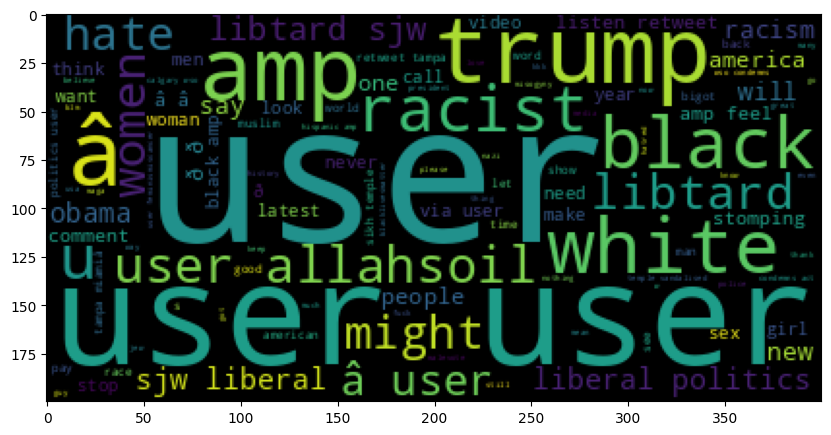

In [54]:
import matplotlib.pyplot as plt
negative = tweets_df[tweets_df['label']==1]
negative_list = negative['tweet'].tolist()
negative_list
negative_sentences_as_one_string = " ".join(negative_list)
plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

<h5>Positivos</h5>

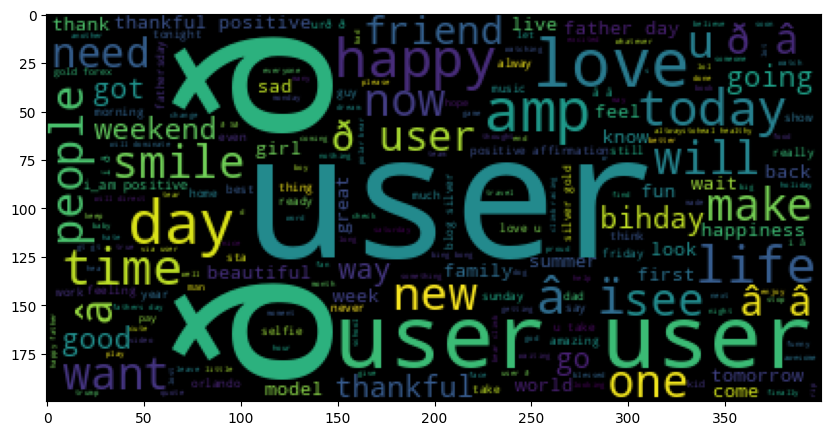

In [55]:
positive = tweets_df[tweets_df['label']==0]
positive_list = positive['tweet'].tolist()
positive_list
pos_sentences_as_one_string = " ".join(positive_list)
plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(pos_sentences_as_one_string))